### 와인  품질 데이터

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols, glm

In [5]:
wine = pd.read_csv('winequality.csv', sep = ',', header = 0)
wine.columns = wine.columns.str.replace(' ','_')

In [6]:
wine.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [8]:
sorted(wine.quality.unique())

[3, 4, 5, 6, 7, 8, 9]

In [9]:
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

### 그룹화, 히스토그램, t 검정

In [10]:
wine.groupby('type')[['quality']].describe().unstack('type')

                type 
quality  count  red      1599.000000
                white    4898.000000
         mean   red         5.636023
                white       5.877909
         std    red         0.807569
                white       0.885639
         min    red         3.000000
                white       3.000000
         25%    red         5.000000
                white       5.000000
         50%    red         6.000000
                white       6.000000
         75%    red         6.000000
                white       6.000000
         max    red         8.000000
                white       9.000000
dtype: float64

In [11]:
wine.groupby('type')[['quality']].quantile([0.25, 0.75]).unstack('type')

quality      
type     red white
0.25     5.0   5.0
0.75     6.0   6.0

In [12]:
#와인 종류에 따른 품질 분포 확인
red_wine = wine.loc[wine['type'] == 'red', 'quality']
white_wine = wine.loc[wine['type'] == 'white', 'quality']

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


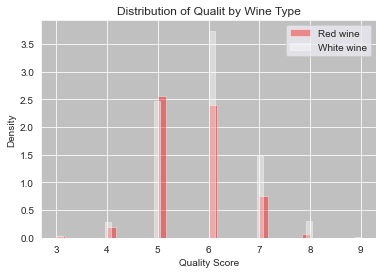

In [36]:
print(sns.distplot(red_wine, norm_hist = True, kde = False, color = 'red', label = 'Red wine'))
print(sns.distplot(white_wine, norm_hist = True, kde = False, color = 'white', label = 'White wine'))
ax = plt.gca()
ax.set_facecolor('silver')
plt.xlabel("Quality Score")
plt.ylabel("Density")
plt.title("Distribution of Qualit by Wine Type")
plt.legend()
plt.show()

In [19]:
wine.groupby(['type'])[['quality']].agg(['std','mean'])
tstat, pvalue, df = sm.stats.ttest_ind(red_wine, white_wine)
print('tstat : %.3f pvalue: %.4f'%(tstat, pvalue))

tstat : -9.686 pvalue: 0.0000


### 상관관계 분석

In [37]:
wine.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


In [38]:
def take_sample(data_frame, replace = False, n =200):
    return data_frame.loc[np.random.choice(data_frame.index, replace=replace, size =n)]

reds_sample = take_sample(wine.loc[wine['type'] == 'red', :])
whites_sample = take_sample(wine.loc[wine['type'] == 'white', :])

In [39]:
wine_sample = pd.concat([reds_sample, whites_sample])
wine['in_sample'] = np.where(wine.index.isin(wine_sample.index), 1.,0.)

pd.crosstab(wine.in_sample, wine.type, margins = True)

type,red,white,All
in_sample,,,
0.0,1399,4698,6097
1.0,200,200,400
All,1599,4898,6497


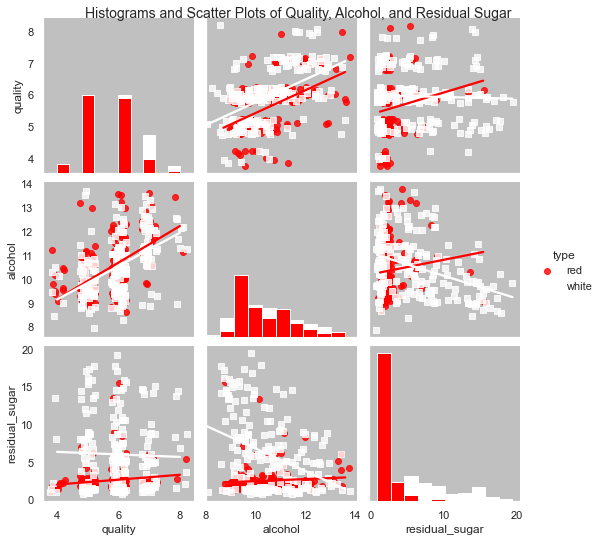

In [48]:
#산점도 그리기
plt.rcParams['axes.facecolor'] = 'silver'
g = sns.pairplot(wine_sample, kind = 'reg', plot_kws = {"ci": False, "x_jitter": 0.25, "y_jitter": 0.25},\
                 hue = 'type', diag_kind = 'hist', diag_kws={"bins": 10, "alpha": 1.0}, palette = dict(red = 'red', white = 'white'),\
                markers = ["o","s"], vars = ['quality', 'alcohol', 'residual_sugar'])

g
plt.suptitle('Histograms and Scatter Plots of Quality, Alcohol, and Residual Sugar', fontsize = 14,\
            horizontalalignment = 'center', verticalalignment = 'top', x = 0.5, y = 0.999)
plt.show()

### 최소제곱법을 이용한 선형회귀분석

In [49]:
my_formula = 'quality ~ alcohol + chlorides + citric_acid + density +\
fixed_acidity + free_sulfur_dioxide + pH + residual_sugar + sulphates +\
total_sulfur_dioxide + volatile_acidity'

In [50]:
lm = ols(my_formula, data = wine).fit()

In [52]:
print(lm.summary())
print("\nQuantities you can extract from the result:\n%s" % dir(lm))
print("\nCoefficients:\n%s" % lm.params)
print("\nCoefficient Std Errors:\n%s" % lm.bse)
print("\nAdj. R -squared:\n%.2f" % lm.rsquared_adj)
print("\nF-statistic: %.1f P-value: %.2f" % (lm.fvalue, lm.f_pvalue))
print("\nNumber of obs: %d Number of fitted values: %s" % (lm.nobs, len(lm.fittedvalues)))

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Wed, 28 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:37:20   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627 

### 독립변수 표준화

In [53]:
dependent_variable = wine['quality']
independent_variables = wine[wine.columns.difference(['quality', 'type', 'in_sample'])]
independent_variables_standardized = (independent_variables - independent_variables.mean()) / independent_variables.std()
wine_standardized = pd.concat([dependent_variable, independent_variables_standardized], axis = 1)

In [54]:
lm_standardized = ols(my_formula, data = wine_standardized).fit()
lm_standardized.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Wed, 28 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:42:28   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.8184      0.009    637.785      0.000       5.800       5.836
alcohol                  0.3185      0.020     15.963      0.000       0.279       0.358
chlorides               -0.0169      0.012     -1.454      0.146      -0.040       0.006
citric_acid             -0.0159      0.012     -1.377      0.168      -0.039       0.007
density                 -0.1648      0.036     -4.529      0.000      -0.236      -0.093
fixed_acidity            0.0877      0.020      4.346      0.000       0.048       0.127
free_sulfur_dioxide      0.1060      0.013      7.948      0.000       0.080       0.132
pH                       0.0706      0.015      4.861      0.000       0.042       0.099
residual_sugar           0.2072      0.025      8.449      0.000       0.159       0.255
sulphates                0.1143      0.011     10.092      0.000       0.092       0.137
total_sulfur_dioxide    -0.1402      0.016     -8.969      0.000      -0.171      -0.110
volatile_acidity        -0.2186      0.013    -17.162      0.000      -0.244      -0.194
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                         9.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 예측하기

In [55]:
#기존 데이터셋의 첫 10개 값을 가지고 새로운 관측값 데이터셋을 만듦
new_observations = wine.loc[wine.index.isin(range(10)), independent_variables.columns]
y_predicted = lm.predict(new_observations)
y_predicted_rounded = [round(score, 2 ) for score in y_predicted]
y_predicted_rounded

[5.0, 4.92, 5.03, 5.68, 5.0, 5.04, 5.02, 5.3, 5.24, 5.69]